# Analytics
The notebook will be used to clean, transform, analyze and visualize the data

# Libraries

In [120]:
import requests
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from pandasql import sqldf

# Load from files

In [181]:
dfLeaguesCSV = pd.read_csv('raw_data/leagues.csv')
dfTeamsCSV = pd.read_csv('raw_data/teams.csv')

# Initialize empty data frames
dfPlayersCSV = pd.DataFrame()
dfPlayerStatsCSV = pd.DataFrame()

# Load all players files
for name in glob.glob('raw_data/players_*.csv'):
    dfPlayersTemp = pd.read_csv(name)
    dfPlayersCSV = pd.concat([dfPlayersCSV, dfPlayersTemp])
    
# Load all player stats files
for name in glob.glob('raw_data/player_stats_*.csv'):
    dfPlayerStatsTemp = pd.read_csv(name)
    dfPlayerStatsCSV = pd.concat([dfPlayerStatsCSV, dfPlayerStatsTemp])

## Columns description

## Shape

# Clean and transform

## Join all data frames
There are several data frames. To perform analysis and build models we need to have just one. Hence we need to combine them.

In [182]:
# Merge players and player stats data sets
dfFootballCSV = dfPlayersCSV.merge(dfPlayerStatsCSV, left_on=['player_id','league_id','season_id'],\
                             right_on=['player_id','league_id','season_id'])

# Merge the result and teams data sets
dfFootballCSV = dfFootballCSV.merge(dfTeamsCSV, left_on=['team_id','league_id','season_id'],\
                             right_on=['team_id','league_id','season_id'])

# Merge the result and leagues data sets
dfFootballCSV = dfFootballCSV.merge(dfLeaguesCSV, left_on='league_id',\
                             right_on='league_id')

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,...,venue_city,venue_capacity,venue_surface,venue_image,league_name_y,league_type,league_logo_y,country_name,country_code,country_flag
0,311,O. Karnezis,Orestis Spyridon,Karnezis,37.0,1985-07-11,Athina,Greece,Greece,189 cm,...,Villeneuve d&apos;Ascq,50083,grass,https://media-2.api-sports.io/football/venues/...,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
1,2205,H. Ben Arfa,Hatem,Ben Arfa,35.0,1987-03-07,Clamart,France,France,178 cm,...,Villeneuve d&apos;Ascq,50083,grass,https://media-2.api-sports.io/football/venues/...,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
2,22226,Jérémy Pied,Jérémy,Pied,33.0,1989-02-23,Grenoble,France,France,173 cm,...,Villeneuve d&apos;Ascq,50083,grass,https://media-2.api-sports.io/football/venues/...,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
3,162589,R. Ascone,Rocco Angelo,Ascone,20.0,2003-09-12,NaN,France,France,180 cm,...,Villeneuve d&apos;Ascq,50083,grass,https://media-2.api-sports.io/football/venues/...,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
4,306862,Bica,José Manuel,Bica Reis,20.0,2003-06-16,NaN,Portugal,Portugal,NaN,...,Villeneuve d&apos;Ascq,50083,grass,https://media-2.api-sports.io/football/venues/...,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,62960,B. Köse,Bahattin,Köse,33.0,1990-08-26,Hamm,Germany,Türkiye,187 cm,...,Akhisar,12139,grass,https://media-1.api-sports.io/football/venues/...,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg
65876,62069,Ö. Özcan,Özgür Can,Özcan,35.0,1988-04-10,Antalya,Türkiye,Türkiye,189 cm,...,Akhisar,12139,grass,https://media-1.api-sports.io/football/venues/...,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg
65877,62923,E. Taşkıran,Erkan,Taşkıran,38.0,1985-04-22,İzmir,Türkiye,Türkiye,183 cm,...,Akhisar,12139,grass,https://media-1.api-sports.io/football/venues/...,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg
65878,13142,L. Guaycochea,Luciano,Guaycochea,31.0,1992-04-24,Santa Rosa,Argentina,Argentina,NaN,...,Akhisar,12139,grass,https://media-1.api-sports.io/football/venues/...,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg


## Initial analysis

Sample

In [252]:
# You can change the index in the .iloc to see more columns
dfFootballCSV.iloc[:,0:].sample(5)

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,...,venue_city,venue_capacity,venue_surface,venue_image,league_name_y,league_type,league_logo_y,country_name,country_code,country_flag
16064,5983,M. Zárate,Mauro Matías,Zárate Riga,36.0,1987-03-18,Haedo,Argentina,Argentina,176 cm,...,Watford,22200,grass,https://media-3.api-sports.io/football/venues/...,Premier League,League,https://media-3.api-sports.io/football/leagues...,England,GB,https://media-2.api-sports.io/flags/gb.svg
46965,337963,Victor Aznar,Victor Wehbi,Aznar Ussen,21.0,2002-10-17,São Paulo,Brazil,Brazil,189 cm,...,Cádiz,22000,grass,https://media-1.api-sports.io/football/venues/...,La Liga,League,https://media-2.api-sports.io/football/leagues...,Spain,ES,https://media-2.api-sports.io/flags/es.svg
30099,10576,Maximiliano Gastón López,Maximiliano Gastón,López,37.0,1984-04-03,Buenos Aires,Argentina,Argentina,185 cm,...,Udine,25952,grass,https://media-1.api-sports.io/football/venues/...,Serie A,League,https://media-1.api-sports.io/football/leagues...,Italy,IT,https://media-1.api-sports.io/flags/it.svg
62427,62257,M. Taş,Mehmet,Taş,32.0,1991-03-20,Mersin,Türkiye,Türkiye,178 cm,...,Ankara,20560,grass,https://media-3.api-sports.io/football/venues/...,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg
43237,41513,Carlos Henriques,Carlos Daniel,Anastácio Henriques,30.0,1993-07-07,Silves,Portugal,Portugal,182 cm,...,Portimão,9544,grass,https://media-3.api-sports.io/football/venues/...,Primeira Liga,League,https://media-2.api-sports.io/football/leagues...,Portugal,PT,https://media-1.api-sports.io/flags/pt.svg


Shape

In [253]:
dfFootballCSV.shape

(65880, 79)

Statistical info

In [257]:
dfFootballCSV.iloc[:,10:].describe(include='all')

,player_weight,player_injured,player_photo,league_id,season_id,team_id,team_name_x,team_logo_x,league_name_x,league_country,...,venue_city,venue_capacity,venue_surface,venue_image,league_name_y,league_type,league_logo_y,country_name,country_code,country_flag
count,60662,65880,65880,65880.000000,65880.000000,65880.000000,65880,65880,65880,65880,...,65813,65880.000000,65880,65880,65880,65880,65880,65880,65880,65880
unique,60,1,36247,NaN,NaN,NaN,309,927,9,10,...,262,NaN,2,702,9,1,10,10,10,10
top,75 kg,False,https://media-2.api-sports.io/football/players...,NaN,NaN,NaN,Genoa,https://media-1.api-sports.io/football/teams/4...,Premier League,Italy,...,London,NaN,grass,https://media-1.api-sports.io/football/venues/...,Premier League,League,https://media-1.api-sports.io/football/leagues...,Italy,IT,https://media-1.api-sports.io/flags/it.svg
freq,4225,65880,10,NaN,NaN,NaN,445,166,12583,8134,...,2030,NaN,63144,362,12583,65880,8134,8134,8134,8134
mean,NaN,NaN,NaN,127.894520,2016.676988,778.168139,NaN,NaN,NaN,NaN,...,NaN,32831.787993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,76.751904,2.903405,1677.066797,NaN,NaN,NaN,NaN,...,NaN,19550.811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,2012.000000,33.000000,NaN,NaN,NaN,NaN,...,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,78.000000,2014.000000,167.000000,NaN,NaN,NaN,NaN,...,NaN,17319.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,135.000000,2017.000000,489.000000,NaN,NaN,NaN,NaN,...,NaN,29062.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,144.000000,2019.000000,631.000000,NaN,NaN,NaN,NaN,...,NaN,43147.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define data frame for machine learning and analytics

### Drop the fields not relevant to machine learning

In [302]:
# Check value counts
for i in ['player_injured','games_number','games_captain','dribbles_past','team_national']:
    print(i + ':')
    print(dfFootballCSV[i].value_counts())

player_injured:
False    65880
Name: player_injured, dtype: int64
games_number:
Series([], Name: games_number, dtype: int64)
games_captain:
False    65880
Name: games_captain, dtype: int64
dribbles_past:
Series([], Name: dribbles_past, dtype: int64)
team_national:
False    65880
Name: team_national, dtype: int64


- **player_name, player_firstname, player_lastname, player_photo, team_logo_x, league_flag, country_flag, league_logo_x, league_logo_y, team_logo_y, venue_image** - not relevant
- **player_injured, games_captain, team_national** - all values False
- **games_number, dribbles_past** - all values NaN
- **league_type** - all values the same
- **player_birth_date** - can be calculated based on player_age
- **team_name_x, team_name_y, team_code** - represents the same data as team_id
- **league_name_x, league_country, team_country, league_name_y, country_name, country_code** - represents the same data as league_id
- **venue_name, venue_address** - represents the same data as venue_id
- **league_season** - represents the same data as league_id

In [314]:
dfFootballML = dfFootballCSV.drop(['player_name','player_firstname','player_lastname','player_birth_date','player_injured',\
    'player_photo','team_name_x','team_logo_x','league_name_x','league_country','league_logo_x','league_flag','games_number',\
    'games_captain','dribbles_past','team_name_y','team_code','team_country','team_national','team_logo_y','venue_name',\
    'venue_address','venue_image','league_name_y','league_type','league_logo_y','country_flag','country_name','country_code',\
    'league_season'], axis=1)

dfFootballML

,player_id,player_age,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,league_id,season_id,team_id,...,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,team_founded,venue_id,venue_city,venue_capacity,venue_surface
0,311,37.0,Athina,Greece,Greece,189 cm,79 kg,61,2021,79,...,NaN,NaN,NaN,NaN,NaN,1944.0,19207,Villeneuve d&apos;Ascq,50083,grass
1,2205,35.0,Clamart,France,France,178 cm,65 kg,61,2021,79,...,NaN,NaN,0.0,0.0,NaN,1944.0,19207,Villeneuve d&apos;Ascq,50083,grass
2,22226,33.0,Grenoble,France,France,173 cm,69 kg,61,2021,79,...,NaN,NaN,0.0,0.0,NaN,1944.0,19207,Villeneuve d&apos;Ascq,50083,grass
3,162589,20.0,NaN,France,France,180 cm,67 kg,61,2021,79,...,NaN,NaN,0.0,0.0,NaN,1944.0,19207,Villeneuve d&apos;Ascq,50083,grass
4,306862,20.0,NaN,Portugal,Portugal,NaN,NaN,61,2021,79,...,NaN,NaN,0.0,0.0,NaN,1944.0,19207,Villeneuve d&apos;Ascq,50083,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,62960,33.0,Hamm,Germany,Türkiye,187 cm,78 kg,203,2013,995,...,NaN,NaN,NaN,NaN,NaN,1970.0,1574,Akhisar,12139,grass
65876,62069,35.0,Antalya,Türkiye,Türkiye,189 cm,79 kg,203,2013,995,...,NaN,NaN,NaN,NaN,NaN,1970.0,1574,Akhisar,12139,grass
65877,62923,38.0,İzmir,Türkiye,Türkiye,183 cm,74 kg,203,2013,995,...,NaN,NaN,NaN,NaN,NaN,1970.0,1574,Akhisar,12139,grass
65878,13142,31.0,Santa Rosa,Argentina,Argentina,NaN,NaN,203,2013,995,...,NaN,NaN,NaN,NaN,NaN,1970.0,1574,Akhisar,12139,grass


### Drop the fields not relevant to analysis
- **player_id, league_id, team_id, venue_id** - id field
- **player_firstname, player_lastname** - combination returns player_name
- **player_photo, team_logo_x, league_flag, country_flag, league_logo_x, league_logo_y, team_logo_y, venue_image** - not relevant
- **player_injured, games_captain, team_national** - all values False
- **games_number, dribbles_past** - all values NaN
- **league_type** - all values the same
- **league_season** - represents the same data as league_id
- **team_name_y, league_name_y** - duplicate

In [340]:
dfLeaguesA = dfFootballCSV.drop(['player_id','player_firstname','player_lastname','player_photo','team_logo_x','league_flag',\
    'country_flag','league_logo_x','league_logo_y','team_logo_y','venue_image','player_injured','games_captain','team_national',\
    'games_number','dribbles_past','league_type','league_id','team_id','league_season','team_name_y','venue_id','league_name_y'\
    ], axis=1)

In [341]:
dfLeaguesA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65880 entries, 0 to 65879
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_name            65878 non-null  object 
 1   player_age             65867 non-null  float64
 2   player_birth_date      65867 non-null  object 
 3   player_birth_place     61114 non-null  object 
 4   player_birth_country   65878 non-null  object 
 5   player_nationality     65878 non-null  object 
 6   player_height          63635 non-null  object 
 7   player_weight          60662 non-null  object 
 8   season_id              65880 non-null  int64  
 9   team_name_x            65880 non-null  object 
 10  league_name_x          65880 non-null  object 
 11  league_country         65880 non-null  object 
 12  games_appearences      65503 non-null  float64
 13  games_lineups          65503 non-null  float64
 14  games_minutes          65503 non-null  float64
 15  ga

## Duplicates

## rename _x and _y columns

## remove cm from player_height

## remove kg from player_weight

## Null values

## Data types

## Min/Max values

## Distribution numeric

## Distribution categorical

## Correlation

## Relationship between categorical and numerical columns

## Distribution of number of teams in leagues for all seasons
It allows us to check if there are any issues with the data. The number of teams in any league and season should be between 10 and 25. The majority of leagues have 18-20 teams.

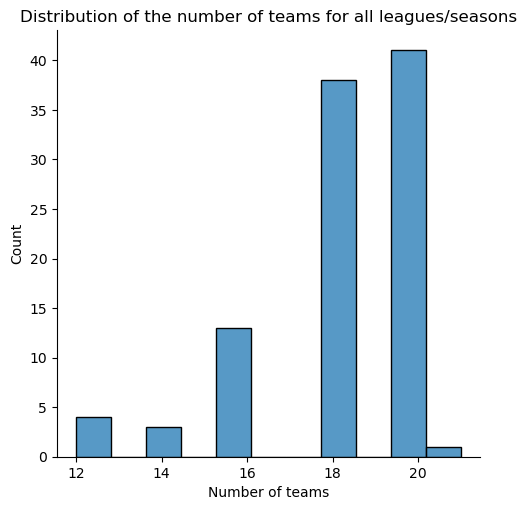

In [194]:
# Group by country and season
sns.displot(dfFootballCSV.groupby(['league_id','season_id'])['team_id'].nunique())\
    .set(xlabel='Number of teams', title='Distribution of the number of teams for all leagues/seasons')

The result is exactly as described above.

## Distribution of players in teams

## Distribution of players/teams in leagues

## Distribution of players/teams/leagues in seasons

## Check if venue_id is unique for each team_id, if majory yes then remove that field
and venue_city vs venue_id

## Remove players missing in teams

In [47]:
sql = '''
SELECT *
FROM dfPlayerStats 
WHERE team_id NOT IN (select team_id from dfTeams)
'''

sqldf(sql)

,team_id,team_name,team_logo,league_id,league_name,league_country,league_logo,league_flag,league_season,games_appearences,...,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,player_id,league_id.1,season_id
0,9256,Olympique Lyonnais II,https://media-2.api-sports.io/football/teams/9...,61,Ligue 1,France,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/fr.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,670,61,2021
1,4715,Excelsior Virton,https://media-3.api-sports.io/football/teams/4...,144,Jupiler Pro League,Belgium,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/be.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,163034,144,2021
2,1353,Swindon Town,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,17968,39,2021
3,1342,Walsall,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,157025,39,2021
4,1353,Swindon Town,https://media-1.api-sports.io/football/teams/1...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,348463,39,2021
5,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,1735,39,2021
6,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,15430,39,2021
7,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,20220,39,2021
8,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45204,39,2021
9,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45285,39,2021


## The same players in players and player_stats

In [53]:
sql = '''
SELECT COUNT(DISTINCT player_id) "Number of players", 'Players' source
FROM dfPlayers 
UNION ALL
SELECT COUNT(DISTINCT player_id) "Number of players", 'Player stats' source
FROM dfPlayerStats
'''

sqldf(sql)

,Number of players,source
0,7123,Players
1,7123,Player stats


## Remove highly correlated features

## remove player_birth_date as there is age

In [ ]:
## Add the same set of features but for the team

# Other

In [137]:
sql = '''
select distinct team_id
from dfFootball 
'''

sql = '''
select distinct player_birth_country
from dfPlayersCSV 
'''



sqldf(sql)

,player_birth_country
0,Greece
1,France
2,Mali
3,Brazil
4,Cameroon
...,...
169,Bosnia-Herzegovina
170,CÃ´te d'Ivoire
171,Montserrat
172,St. Lucia
